# Graduate Quantitative Researcher Puzzle 

### adding packages:

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import math

An ant leaves its anthill in order to forage for food. It moves with the __speed of 10cm per second__ , but it doesn't know where to go, therefore __every second it moves randomly 10cm__ directly north, south, east or west with equal probability.

1) If the food is located on __east-west lines 20cm to the north and 20cm to the south__, as well as on __north-south lines 20cm to the east and 20cm to the west__ from the anthill, how long will it take the ant to reach it on average?


In [3]:
def one_step(current_location): # defining the step function
    moveE = [10,0] # east move
    moveW = [-10,0] # west move
    moveN = [0,10] #north move
    moveS= [0,-10] # south move
    move = random.choice([moveE,moveW, moveN, moveS]) #randomly choosing one of the north, south, east, or west movements
    new_location = [x + y for (x, y) in zip(current_location, move)] #updating the location after one random step
    return new_location

In [4]:
travel_times = [] #travel time (i.e., number_of_steps * 10cm/sec) to food
n=100000 #number of simulations
for i in np.arange(n):
    location = [0,0]
    steps = 0 #shows the number of steps to get to food
    while (abs(location[0])<20) & (abs(location[1])<20): # checking if the ant has reached the food after the previous step
        location = one_step(location)
        steps+=1 #counting the number of steps which is the indicator of travel time because each step takes 1 second
    else: 
        travel_times += [steps] #recording the travel time for this simulation

print('Average travel time to food is converging to {} seconds'.format(round(10*np.mean(travel_times))/10))

Average travel time to food is converging to 4.5 seconds


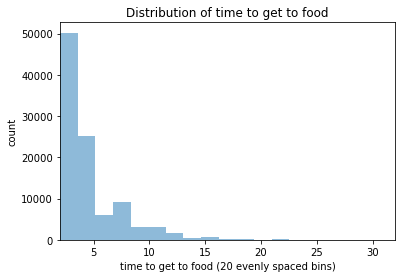

In [5]:
bins = np.linspace(math.ceil(min(travel_times)), 
                   math.floor(max(travel_times)),
                   20) # fixed number of bins

plt.xlim([min(travel_times), max(travel_times)])

plt.hist(travel_times, bins=bins, alpha=0.5) # plotting the histogram of travle times with 20 bins (i.e., intervals)
plt.title('Distribution of time to get to food')
plt.xlabel('time to get to food (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()

2) What is the average time the ant will reach food if it is located only on a __diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points__? 

This means that the food is located on the line: Y=-X+10, This means that once Y+X-10>=0 the ant has reached the food. The plot of this line is displayed below. As we do not have a closed boundary, there is also a possibility that the ant does not reach food at all. Therefore, the travel time does not converge. 


Average travel time to food is 38 seconds for when number of simulation is 100
Average travel time to food is 2110 seconds for when number of simulation is 150
Average travel time to food is 50 seconds for when number of simulation is 200
Average travel time to food is 454 seconds for when number of simulation is 250


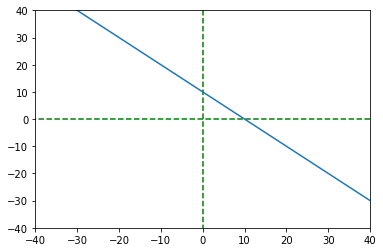

In [6]:
x= np.linspace(-40,40,1000)
y= -x+10
x1=[0,0]
y1=[40,-40]
plt.plot(x1,y1, color='green', linestyle='dashed')
x2=[40,-40]
y2=[0,0]
plt.plot(x2,y2, color='green', linestyle='dashed')
plt.plot(x,y)
plt.xlim(-40,40)
plt.ylim(-40,40)
for n in [100,150,200,250]:
    travel_times = []
    for i in np.arange(n):
        location = [0,0]
        steps = 0 #shows the number of steps to get to food
        while (location[0]+location[1]-10<0):
            location = one_step(location)
            steps+=1
        else: travel_times += [steps]

    print('Average travel time to food is {} seconds for when number of simulation is {}'.format(round(np.mean(travel_times)),n))

The above average travel times are determined using different number of simulations. Accordingly, the average travel time does not have limit (i.e., does not converge). 
___________________________
3) Can you write a program that comes up with an estimate of average time to find food for any __closed boundary around the anthill__? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.


In [7]:
travel_times = [] #travel time (i.e., number_of_steps * 10cm/sec) to food
n=10000 #number of simulations
for i in np.arange(n):
    location = [0,0]
    steps = 0 #shows the number of steps to get to food
    while (((location[0]-2.5)/30)**2+((location[1]-2.5)/40)**2<1): # here we define our closed boundary
        location = one_step(location)
        steps+=1
    else: 
        travel_times += [steps]

print('Average travel time to food is converging to {} seconds'.format(round(np.mean(travel_times))))

Average travel time to food is converging to 14 seconds


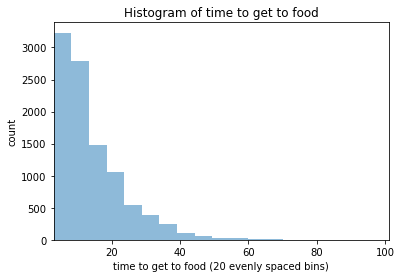

In [8]:
bins = np.linspace(math.ceil(min(travel_times)), 
                   math.floor(max(travel_times)),
                   20) # fixed number of bins

plt.xlim([min(travel_times), max(travel_times)])

plt.hist(travel_times, bins=bins, alpha=0.5)
plt.title('Histogram of time to get to food')
plt.xlabel('time to get to food (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()